# Feature reduction

## Uniform Manifold Approximation and Projection (UMAP)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap 
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [3]:
import pandas as pd
import numpy as np
neuro_df = pd.read_csv("/Users/pgarciaegan/Dissertation/ML_Vol_Rab_imputed_data_Zclean.csv")
neuro_df = neuro_df.set_index('pid_scandate')

In [4]:
neuro_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 210066A_042017 to 500422A_051717
Columns: 152 entries, hiv_status to sex__female
dtypes: float64(113), int64(39)
memory usage: 341.9+ KB


In [5]:
neuro_df1 = neuro_df.loc[:,'premature_birth_complications':'sex__male']

In [6]:
sns.set(style='white', rc={'figure.figsize':(10,8)})

In [7]:
# UMAP enahanced clustering
embedding = umap.UMAP(
    n_neighbors=43,
    min_dist=0.01,
    n_components=2,
    random_state=42,
).fit(neuro_df1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

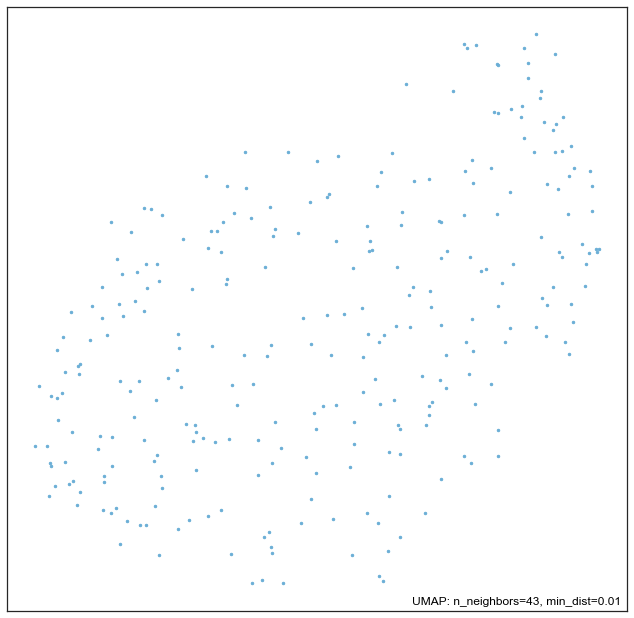

In [8]:
import umap.plot
umap.plot.points(embedding)

# Hierarchichal Clustering Algortithm 

### Hierarchical Density-Based Spatial Clustering of Applications with Noise

In [9]:
# HDBSCAN
clusters = hdbscan.HDBSCAN(min_samples=10, leaf_size=40, gen_min_span_tree=True, min_cluster_size=6, 
                         prediction_data=True)
clusters.fit(embedding.embedding_)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=6, min_samples=10,
        prediction_data=True)

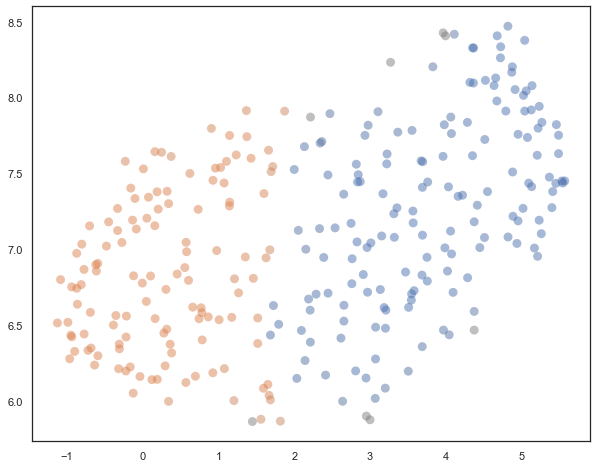

In [10]:
# clustering diagram
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
palette = sns.color_palette('deep', 8)
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusters.labels_, clusters.probabilities_)]
plt.scatter(embedding.embedding_.T[0], embedding.embedding_.T[1], c=cluster_colors, **plot_kwds)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


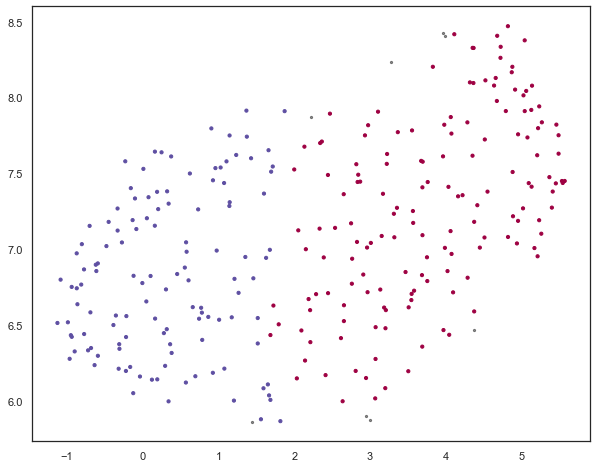

/Users/pgarciaegan/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/Users/pgarciaegan/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarn

<AxesSubplot:>

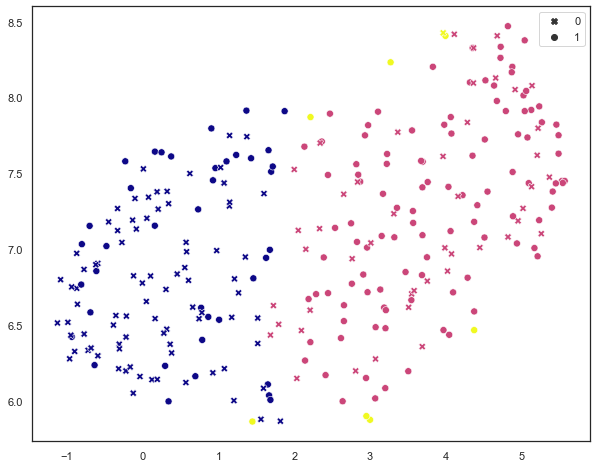

In [14]:
# Visualize the HDBSCAN results
clustered = (clusters.labels_ >= 0)
markers = { 1: "o", 0: "X"}
#markers = { map(1,'HIV Positive)'): "s", 0: "X"}
plt.scatter(embedding.embedding_[~clustered, 0],
            embedding.embedding_[~clustered, 1],
            c=(0.1, 0.1, 0.1),
            s=5,
            alpha=0.5)
plt.scatter(embedding.embedding_[clustered, 0],
            embedding.embedding_[clustered, 1],
            c=clusters.labels_[clustered],
            s=10,
            cmap='Spectral'
            )
plt.show()
sns.scatterplot(embedding.embedding_[~clustered, 0],
            embedding.embedding_[~clustered, 1],
            c=(0.1, 0.1, 0.1),
            s=5,
            alpha=0.5)
sns.scatterplot(embedding.embedding_[:, 0],
            embedding.embedding_[:,1],
            c=clusters.labels_,
            s=50,
            cmap='plasma_r',
            style=neuro_df['hiv_status'].values,
            markers = markers
            )


<AxesSubplot:ylabel='$\\lambda$ value'>

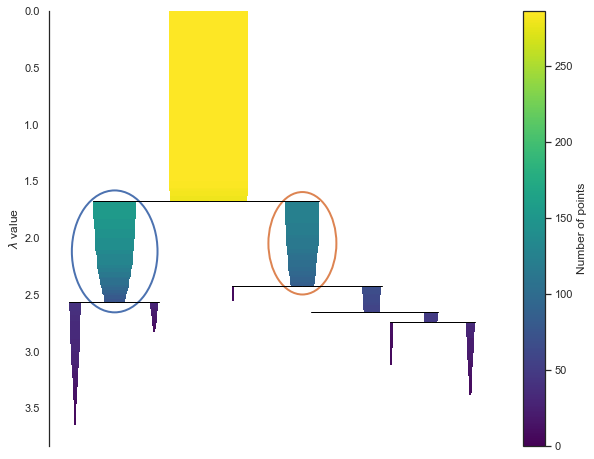

In [259]:
#Gives us condense tree plot
clusters.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [262]:
# Tells us how much of the data was clustered
np.sum(clustered) / neuro_df1.shape[0]

0.972027972027972

In [17]:
neuro_df['cluster_labels']=clusters.labels_
neuro_df[neuro_df['cluster_labels']==1]


,hiv_status,Zduration_of_infection,Zrecent_cd4,ZELSQ_total_nodmesticv,ELSQ3,Abuse_1,Learn_Z,Delay_Z,PM_Z,Lang_Z,...,race__AA,race__White,ZPeople_6months,ZPeople_LiFETIME,ZAffective_BDI,ZCognitive_BDI,ZSomatic_BDI,sex__male,sex__female,cluster_labels
pid_scandate,,,,,,,,,,,,,,,,,,,,,
212370E_050214,1,1.097496,-0.839364,0.955165,1,1,-1.249907,-1.067625,-0.853333,-2.10790,...,1,0,0.708273,-0.057774,2.443139,0.930199,0.541570,1,0,1
212522B_101317,1,1.579668,-0.077549,-0.152310,1,0,-0.386980,-0.196065,-0.366667,0.36160,...,1,0,-0.086104,-0.232366,-0.784287,-0.427582,-0.295849,1,0,1
212796E_102913,1,1.751288,-0.915878,-0.890627,0,0,-1.458414,-2.610703,0.441667,-1.08450,...,0,1,2.297025,0.649784,1.367330,0.251308,1.937268,1,0,1
212969J_040714,1,0.206704,-0.683009,-0.890627,0,0,-1.693220,-1.456752,0.806000,1.44635,...,0,1,-0.880480,-0.140475,-0.784287,-0.767027,-1.133267,1,0,1
213206L_051614,1,0.672531,-0.047609,-1.259785,0,0,-0.439361,-0.093450,-0.146667,0.48780,...,1,0,-0.086104,-0.204799,-0.784287,-0.767027,-1.133267,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500376A_102615,0,-0.798501,0.727512,-0.152310,1,0,-0.063573,0.117031,0.540000,-0.38480,...,0,1,-0.880480,-0.269122,-0.784287,-0.767027,-0.574988,0,1,1
500378A_102915,0,-0.798501,0.727512,2.431799,1,1,-1.138417,-0.698257,-0.886667,0.71920,...,0,1,-0.880480,-0.232366,-0.784287,-0.088137,-0.295849,0,1,1
500381A_111815,0,-0.798501,0.727512,-1.259785,0,0,-0.236735,0.124893,0.460000,-1.08590,...,0,1,-0.086104,-0.250744,-0.784287,-0.427582,-1.133267,0,1,1


In [285]:
# separate continouos variables from categorical variables coded 1 or 0

df_continous = []
df_others = []

for c in neuro_df.columns:
    if (statistics.loc['min',c] == 0.0 ) & (statistics.loc['max',c] == 1.0): 
        df_others.append(c)     
    else:   
        df_continous.append(c)
        
print (len(df_continous))   
print (len(df_others))


114
39


In [327]:
# make a filter on cluster labels greater than or equal to zero
cluster_ge_filter = neuro_df['cluster_labels']>=0
type(clusters)
print( np.shape(neuro_df[cluster_ge_filter]))
np.shape(neuro_df[df_continous][cluster_filter])
print( np.shape(neuro_df[neuro_df['cluster_labels']>=0] ) )
print( np.shape(neuro_df[neuro_df['cluster_labels']>=1] ) )
neuro_df['cluster_labels'].values
neuro_df[cluster_filter]['cluster_labels'].values


(278, 153)
(278, 153)
(123, 153)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [331]:
# Describe relationship of features to the target

mwu_list=[]
for z in df_continous: 
    comparison = pg.mwu(neuro_df[cluster_filter]['cluster_labels'], neuro_df[z], tail='one-sided')
    if (comparison.loc['MWU','p-val'] <= 0.050 ) :
          mwu_list.append(z)
print(mwu_list)

df_to_compare = neuro_df.loc[:, mwu_list]
df_to_compare

['Zduration_of_infection', 'ZELSQ_total_nodmesticv', 'Learn_Z', 'Delay_Z', 'PM_Z', 'HVLTLearn_Z', 'HVLTDelay_Z', 'GPDom_Z', 'GPNonDom_Z', 'DS_Z', 'LNS_Z', 'Verb_Z', 'FAS_Z', 'ZEducation', 'ZCocaine_total', 'ZOpiates_heroin_total', 'ZNorm_LeftCaudate', 'ZNorm_RightCaudate', 'ZNorm_RightPallidum', 'ZNorm_RightHippocampus', 'ZNorm_RightAmygdala', 'ZNorm_lh_bankssts_volume', 'ZNorm_lh_caudalanteriorcingulate_volume', 'ZNorm_lh_caudalmiddlefrontal_volume', 'ZNorm_lh_cuneus_volume', 'ZNorm_lh_entorhinal_volume', 'ZNorm_lh_fusiform_volume', 'ZNorm_lh_inferiortemporal_volume', 'ZNorm_lh_inferiorparietal_volume', 'ZNorm_lh_postcentral_volume', 'ZNorm_lh_posteriorcingulate_volume', 'ZNorm_lh_precuneus_volume', 'ZNorm_lh_superiorparietal_volume', 'ZNorm_lh_supramarginal_volume', 'ZNorm_rh_inferiorparietal_volume', 'ZNorm_rh_paracentral_volume', 'ZNorm_rh_postcentral_volume', 'ZNorm_rh_superiorparietal_volume', 'ZNorm_rh_supramarginal_volume', 'ZNorm_lh_isthmuscingulate_volume', 'ZNorm_lh_lateralo

,Zduration_of_infection,ZELSQ_total_nodmesticv,Learn_Z,Delay_Z,PM_Z,HVLTLearn_Z,HVLTDelay_Z,GPDom_Z,GPNonDom_Z,DS_Z,...,ZNorm_rh_superiortemporal_volume,ZNorm_rh_frontalpole_volume,ZNorm_rh_temporalpole_volume,ZNorm_rh_transversetemporal_volume,ZNorm_CSF,ZPeople_6months,ZPeople_LiFETIME,ZAffective_BDI,ZCognitive_BDI,ZSomatic_BDI
pid_scandate,,,,,,,,,,,,,,,,,,,,,
210066A_042017,2.241632,-0.152310,1.707366,0.739884,0.340000,1.480570,0.017879,-0.2,0.6,1.000000,...,0.438884,-0.202450,-0.387975,1.876662,0.686062,-0.880480,-0.232366,0.829426,1.609089,-0.295849
210084D_040115,1.873874,0.955165,1.076114,1.377625,1.340000,1.112229,1.160122,0.7,0.5,1.666667,...,1.042482,-0.700312,1.544321,2.450222,-0.078175,-0.880480,0.429246,1.905235,1.269644,1.658128
210104J_090717,2.315183,-0.890627,-0.184253,0.036273,-0.440000,-0.777224,-1.094719,-1.4,-1.4,-0.333333,...,0.148034,-0.858015,-0.292630,0.019918,1.267840,-0.086104,1.660580,-0.784287,-0.767027,-1.133267
210718K_082216,1.849357,-0.152310,0.997206,0.009290,0.886667,0.358188,-0.661805,-0.7,0.0,1.666667,...,-0.326252,0.745380,-1.833864,-0.052114,-0.908255,-0.880480,-0.085341,-0.784287,-0.767027,-1.133267
210947F_083116,1.687563,0.586007,-0.160395,-0.067914,-0.353333,-0.871567,-0.961148,-0.2,0.4,0.333333,...,-0.082672,0.037685,-0.218368,-0.765989,-0.599277,-0.880480,-0.021018,-0.784287,-0.767027,-1.133267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500417A_042717,-0.798501,-0.890627,-1.663576,-1.810417,0.266667,-1.663576,-1.810417,-0.6,-0.1,1.000000,...,-0.134771,-0.852822,-0.563566,-0.797787,2.328829,-0.086104,-0.195610,-0.246383,-0.088137,-0.295849
500418A_050117,-0.798501,-0.152310,0.736681,0.273568,0.680000,0.335683,-0.468324,1.2,1.0,0.000000,...,1.726243,0.570006,-1.761374,1.317600,-0.779494,-0.086104,-0.241555,-0.784287,-0.767027,-1.133267
500419A_050517,-0.798501,-1.259785,-0.386796,-0.565728,0.740000,-0.386796,-0.565728,0.7,1.2,0.000000,...,0.568121,0.718273,-1.279988,0.435371,-0.333993,-0.086104,-0.039396,-0.784287,-0.767027,-1.133267


In [414]:
expected, observed, stats= pg.chi2_independence(neuro_df, 'cluster_labels', 'hiv_status', correction=True)
print (stats)
observed

                 test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  44.871864  2.0  1.803842e-10  0.396099   
1        cressie-read  0.666667  45.143320  2.0  1.574899e-10  0.397296   
2      log-likelihood  0.000000  46.260248  2.0  9.009792e-11  0.402180   
3       freeman-tukey -0.500000  47.673137  2.0  4.445389e-11  0.408276   
4  mod-log-likelihood -1.000000  49.684002  2.0  1.626508e-11  0.416798   
5              neyman -2.000000  56.155389  2.0  6.397529e-13  0.443111   

      power  
0  0.999994  
1  0.999994  
2  0.999996  
3  0.999998  
4  0.999999  
5  1.000000  


/Users/pgarciaegan/opt/anaconda3/lib/python3.7/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/Users/pgarciaegan/opt/anaconda3/lib/python3.7/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


hiv_status,0,1
cluster_labels,,
-1,1,7
0,46,109
1,84,39


In [29]:
neuro_df_filtered=neuro_df[neuro_df['cluster_labels']> -1]
neuro_df_filtered.shape

(278, 153)

# Classification

## Random Forest

In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
#Convert Data to Arrays
# Use numpy to convert to arrays

# Labels are the values we want to predict
labels = np.array(neuro_df_filtered['cluster_labels'])

# Remove the labels from the features
# axis 1 refers to the columns
features= neuro_df_filtered.drop('cluster_labels', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [31]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [32]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (208, 152)
Training Labels Shape: (208,)
Testing Features Shape: (70, 152)
Testing Labels Shape: (70,)


In [33]:
#Random Forest
#from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Instantiate model with 1000 decision trees
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=42)

# Train the model on training data
clf.fit(train_features, train_labels);

In [34]:
# Use the forest's predict method on the test data
print(clf.predict(test_features))

[0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0]


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labels, clf.predict(test_features)))
print(classification_report(test_labels, clf.predict(test_features)))
print(accuracy_score(test_labels, clf.predict(test_features)))

[[38  4]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.86      0.86      0.86        28

    accuracy                           0.89        70
   macro avg       0.88      0.88      0.88        70
weighted avg       0.89      0.89      0.89        70

0.8857142857142857


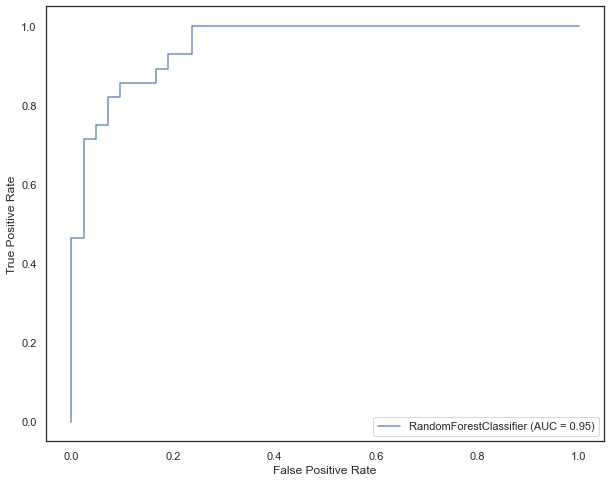

In [36]:
# Receiver operating characteristic curve (ROC)
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(clf, test_features, test_labels, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [40]:
# Get numerical feature importances
importances = np.array(list(clf.feature_importances_))
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: ZAge                 Importance: 0.08
Variable: ZNorm_lh_middletemporal_volume Importance: 0.07
Variable: ZNorm_lh_rostralmiddlefrontal_volume Importance: 0.07
Variable: ZNorm_lh_lateralorbitofrontal_volume Importance: 0.06
Variable: ZNorm_rh_superiorfrontal_volume Importance: 0.06
Variable: ZNorm_rh_precuneus_volume Importance: 0.05
Variable: ZNorm_lh_superiorfrontal_volume Importance: 0.05
Variable: ZNorm_rh_lateralorbitofrontal_volume Importance: 0.05
Variable: ZNorm_lh_inferiorparietal_volume Importance: 0.04
Variable: ZNorm_rh_fusiform_volume Importance: 0.03
Variable: ZNorm_rh_medialorbitofrontal_volume Importance: 0.03
Variable: ZNorm_rh_middletemporal_volume Importance: 0.03
Variable: ZNorm_rh_precentral_volume Importance: 0.03
Variable: ZNorm_RightThalamusProper Importance: 0.02
Variable: ZNorm_RightPutamen   Importance: 0.02
Variable: ZNorm_lh_precuneus_volume Importance: 0.02
Variable: ZNorm_rh_rostralmiddlefrontal_volume Importance: 0.02
Variable: ZNorm_rh_superio

In [44]:
# Get numerical feature importances
importances = np.array(list(clf.feature_importances_))
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = pd.DataFrame(sorted(feature_importances, key = lambda x: x[1], reverse = True), columns=['name', 'importance'])
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances

,name,importance
0,ZAge,0.08
1,ZNorm_lh_middletemporal_volume,0.07
2,ZNorm_lh_rostralmiddlefrontal_volume,0.07
3,ZNorm_lh_lateralorbitofrontal_volume,0.06
4,ZNorm_rh_superiorfrontal_volume,0.06
...,...,...
147,ZAffective_BDI,0.00
148,ZCognitive_BDI,0.00
149,ZSomatic_BDI,0.00
150,sex__male,0.00


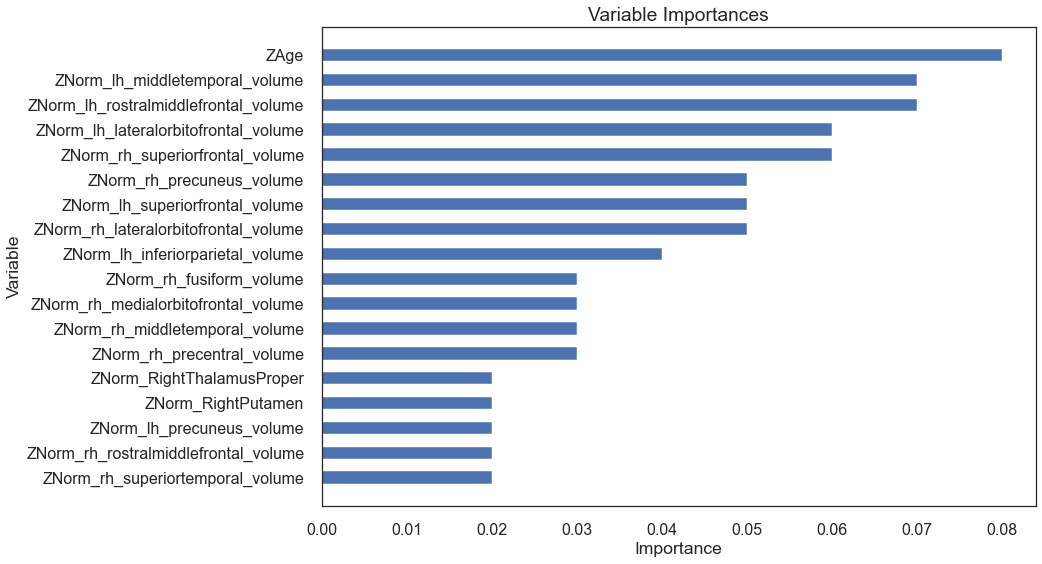

In [45]:
#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('seaborn-poster')
# list of x locations for plotting
# x_values = list(range(len(importances[importances >= 0.02])))
filtered_df = feature_importances[feature_importances['importance'] >= 0.02]
# print ( filtered_df)
x_values = sorted(list(range(len(filtered_df))), reverse=True)
# Make a bar chart
plt.barh(x_values, filtered_df['importance'], height = .5)
# Tick labels for x axis
plt.yticks(x_values, filtered_df['name'] )
# Axis labels and title
plt.ylabel('Variable'); plt.xlabel('Importance'); plt.title('Variable Importances');
plt.show()